In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import os

import lsdb
import hats

from upath import UPath

import matplotlib.pyplot as plt

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


In [2]:
!aws s3 ls s3://rubin-lincc-hats/hats/w_2025_18/ 


                           PRE dia_object/
                           PRE dia_object_collection/
                           PRE dia_object_forced_source/
                           PRE dia_source/


In [3]:
!aws s3 ls s3://rubin-lincc-hats/hats/w_2025_19/ 

                           PRE dia_object/
                           PRE dia_object_collection/
                           PRE dia_object_forced_source/
                           PRE dia_source/


In [8]:
!aws s3 ls s3://rubin-lincc-hats/hats/w_2025_19/dia_object 

                           PRE dia_object/
                           PRE dia_object_collection/
                           PRE dia_object_forced_source/


In [4]:

# If the AWS_ENDPOINT_URL is not set, add the following to UPath:
# endpoint_url=os.env["LSST_RESOURCES_S3_PROFILE_embargo"]
dia_object_lc = lsdb.read_hats(UPath("s3://rubin-lincc-hats/hats/w_2025_19/dia_object_collection"), 
                               columns = ["diaObjectId", "ra", "dec", 'tract', "diaObjectForcedSource"])
dia_object_lc_hats = hats.read_hats(UPath("s3://rubin-lincc-hats/hats/w_2025_19/dia_object_collection")).main_catalog

dia_object_lc

INFO:aiobotocore.credentials:Found credentials in shared credentials file: /sdf/home/n/ncaplar/.lsst/aws-credentials.ini
INFO:botocore.configprovider:Found endpoint for s3 via: environment_global.


,diaObjectId,ra,dec,tract,diaObjectForcedSource
npartitions=202,,,,,
"Order: 5, Pixel: 6421",int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],"nested<parentObjectId: [int64], coord_ra: [dou..."
"Order: 5, Pixel: 6422",...,...,...,...,...
...,...,...,...,...,...
"Order: 8, Pixel: 443989",...,...,...,...,...
"Order: 6, Pixel: 27760",...,...,...,...,...


INFO:aiobotocore.credentials:Found credentials in shared credentials file: /sdf/home/n/ncaplar/.lsst/aws-credentials.ini
INFO:botocore.configprovider:Found endpoint for s3 via: environment_global.
/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/botocore/auth.py:424: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime_now = datetime.datetime.utcnow()
/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/botocore/auth.py:424: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime_now = datetime.datetime.utcnow()
/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/botocore/auth.py:424: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled 

In [30]:
from lsdb.core.search import ConeSearch
dia_object_lc = lsdb.read_hats(UPath("s3://rubin-lincc-hats/hats/w_2025_19/dia_object_collection"), 
                               columns = ["diaObjectId", "ra", "dec", 'tract', "diaObjectForcedSource"],
                                search_filter = ConeSearch(ra=182, dec=7.0, radius_arcsec=3 * 3600)
)

/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/botocore/auth.py:424: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime_now = datetime.datetime.utcnow()
/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/botocore/auth.py:424: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime_now = datetime.datetime.utcnow()
/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/botocore/auth.py:424: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime_now = datetime.datetime.utcnow()
/sdf/home/n/ncaplar/.loca

In [31]:
dia_object_lc

,diaObjectId,ra,dec,tract,diaObjectForcedSource
npartitions=22,,,,,
"Order: 6, Pixel: 27670",int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],"nested<parentObjectId: [int64], coord_ra: [dou..."
"Order: 7, Pixel: 110684",...,...,...,...,...
...,...,...,...,...,...
"Order: 7, Pixel: 110898",...,...,...,...,...
"Order: 6, Pixel: 27726",...,...,...,...,...


(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Coverage MOC of dia_object_lc'}>)

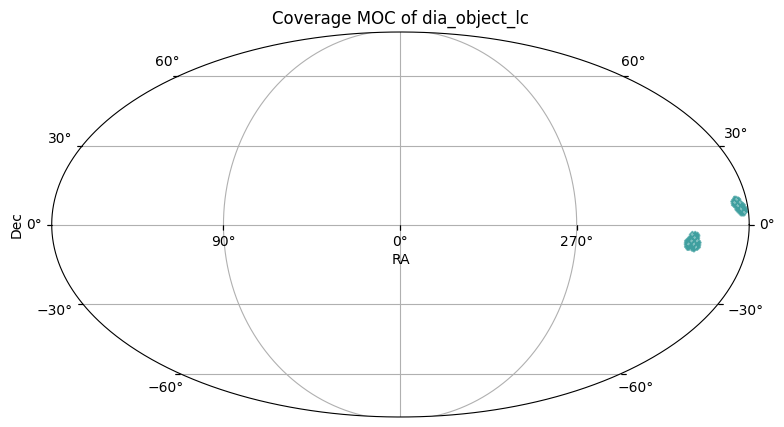

In [23]:
dia_object_lc_hats.plot_moc()

In [32]:
test = dia_object_lc.head(100)

In [43]:
test.iloc[1].diaObjectForcedSource

,parentObjectId,coord_ra,coord_dec,visit,detector,band,psfFlux,psfFluxErr,psfFlux_flag,psfDiffFlux,...,pixelFlags_saturatedCenter,pixelFlags_suspect,pixelFlags_suspectCenter,invalidPsfFlag,tract,patch,forcedSourceOnDiaObjectId,psfMag,psfMagErr,midpointMjdTai
0,0,183.450415,4.387832,2025042400239,31,i,3704804.250,1774.271851,False,3.692036e+06,...,True,True,True,False,10077,92,24593908184383750,14.978086,0.000520,60790.186311
1,0,183.450415,4.387832,2025042900305,9,u,1161334.875,2302.786865,False,-6.548773e+04,...,False,False,False,False,10077,92,24615907263774995,16.237606,0.002153,60795.178921
2,0,183.450415,4.387832,2025050100544,9,u,1132084.125,2276.435547,False,-1.834908e+04,...,False,False,False,False,10077,92,24624735434834104,16.265303,0.002183,60797.183793
3,0,183.450415,4.387832,2025050300499,9,u,1126283.375,2305.884521,False,-1.697079e+04,...,False,False,False,False,10077,92,24633525488058531,16.270882,0.002223,60799.179212
4,0,183.450415,4.387832,2025050300529,10,u,1127695.250,2358.216553,False,-5.063955e+04,...,False,False,False,False,10077,92,24633529515114572,16.269520,0.002271,60799.197017


In [ ]:
# Identify all columns that contain 'flag'
flag_cols = [col for col in test.iloc[1].diaObjectForcedSource.columns if 'flag' in col.lower()]

# Exclude rows where any flag column is True
flag_mask = ~(all_forced_sources_w19[flag_cols].any(axis=1))  # True where all flags are False
all_forced_sources_w19_clean = all_forced_sources_w19[flag_mask]

In [ ]:
from dask.distributed import Client

# Start with a small client
client = Client(n_workers=24, memory_limit="3GB", threads_per_worker=1)
client.close()

In [39]:
single_df = dia_object_lc._ddf.get_partition(3).compute()

2025-05-17 16:02:12,637 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.99 GiB -- Worker memory limit: 2.79 GiB
2025-05-17 16:02:12,942 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 2.26 GiB -- Worker memory limit: 2.79 GiB
2025-05-17 16:02:18,846 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/distributed/comm/tcp.py", line 226, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cau

KeyboardInterrupt: 

2025-05-17 16:02:20,850 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-05-17 16:02:20,857 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2025-05-17 16:02:20,859 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2025-05-17 16:02:20,860 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2025-05-17 16:02:20,862 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-05-17 16:02:20,862 - distributed.nanny - ERROR - Worker process died unexpectedly
2025-05-17 16:02:20,862 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2025-05-17 16:02:20,863 - distributed.nanny - ERROR - W

In [30]:
first_df

,diaObjectId,ra,dec,tract,diaObjectForcedSource
npartitions=1,,,,,
1801158375971487744,int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],"nested<parentObjectId: [int64], coord_ra: [double], coord_dec: [double], visit: [int64], detector: [int16], band: [string], psfFlux: [float], psfFluxErr: [float], psfFlux_flag: [bool], psfDiffFlux: [float], psfDiffFluxErr: [float], psfDiffFlux_flag: [bool], diff_PixelFlags_nodataCenter: [bool], pixelFlags_bad: [bool], pixelFlags_cr: [bool], pixelFlags_crCenter: [bool], pixelFlags_edge: [bool], pixelFlags_interpolated: [bool], pixelFlags_interpolatedCenter: [bool], pixelFlags_nodata: [bool], pixelFlags_saturated: [bool], pixelFlags_saturatedCenter: [bool], pixelFlags_suspect: [bool], pixelFlags_suspectCenter: [bool], invalidPsfFlag: [bool], tract: [int64], patch: [int64], forcedSourceOnDiaObjectId: [int64], psfMag: [float], psfMagErr: [float], midpointMjdTai: [double]>"
1807350825459122176,...,...,...,...,...


In [37]:
dia_object_lc_hats.main_catalog.plot_moc()

AttributeError: 'Catalog' object has no attribute 'main_catalog'

In [28]:
first_df = dia_object_lc._ddf.get_partition(0).compute()
first_df

diaObjectId          ra       dec  tract  \
_healpix_29                                                           
1801293030031628531  64242127948742659  180.493787 -0.871666   9348   
1801294619060969119  64242127948742657  180.498498 -0.784037   9348   
...                                ...         ...       ...    ...   
1801439483988195341  64238348377522177   179.91495  -0.07482   9347   
1801439688905295672  64245770081009665  180.009455 -0.038362   9348   

                                                 diaObjectForcedSource  
_healpix_29                                                             
1801293030031628531  [{parentObjectId: 0, coord_ra: 180.493787, coo...  
1801294619060969119  [{parentObjectId: 0, coord_ra: 180.498498, coo...  
...                                                                ...  
1801439483988195341  [{parentObjectId: 0, coord_ra: 179.91495, coor...  
1801439688905295672  [{parentObjectId: 0, coord_ra: 180.009455, coo...  

[32 rows x 5 columns]

In [13]:
singledia_object_lc.query("tract == 10563").head()

KeyboardInterrupt: 